# <p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc

In [ ]:
#!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/AAIC/Classroom/Assignment/15_Facebook/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/AAIC/Classroom/Assignment/15_Facebook/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [5]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [6]:
df_final_train.drop(['indicator_link'],axis=1,inplace=True)
df_final_test.drop(['indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9134734626246626 test Score 0.8698418194014671
Estimators =  50 Train Score 0.9202517042475092 test Score 0.9018085650912813
Estimators =  100 Train Score 0.9225489170241707 test Score 0.917456249080863
Estimators =  250 Train Score 0.9229916897506927 test Score 0.9151985855907053
Estimators =  450 Train Score 0.923543372120984 test Score 0.9159283654959068


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

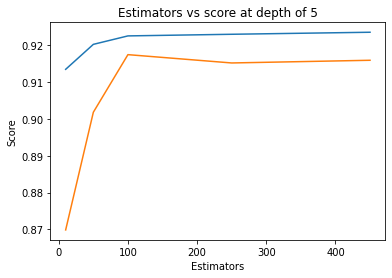

In [7]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                 max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


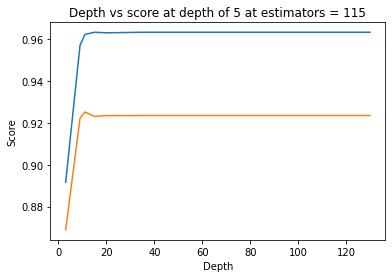

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at estimators = 115')
plt.show()

In [8]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,return_train_score=True,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96213851 0.96183154 0.96037467 0.96207089 0.96285674]
mean train scores [0.96314275 0.96254055 0.96088891 0.9627027  0.96395558]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [10]:
clf = RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9636780303798496
Test f1 score 0.9257234185733513


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


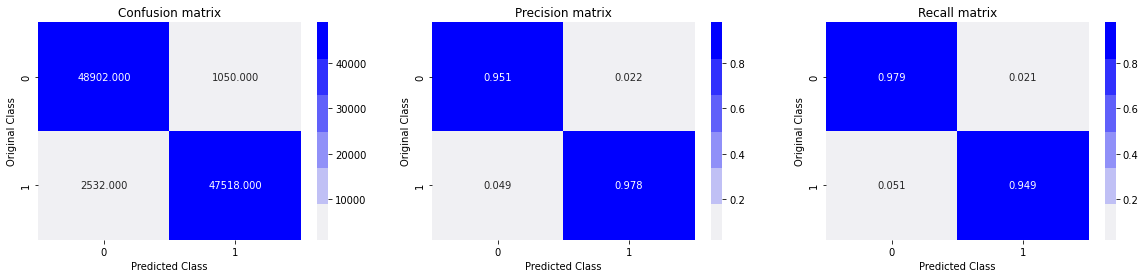

Test confusion_matrix


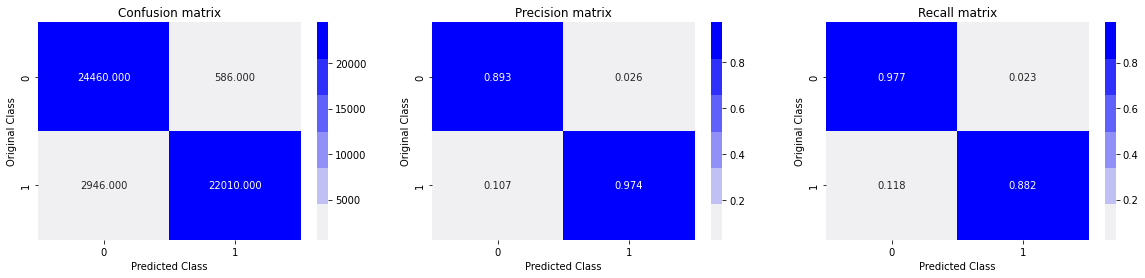

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

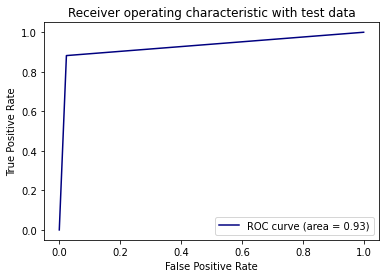

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

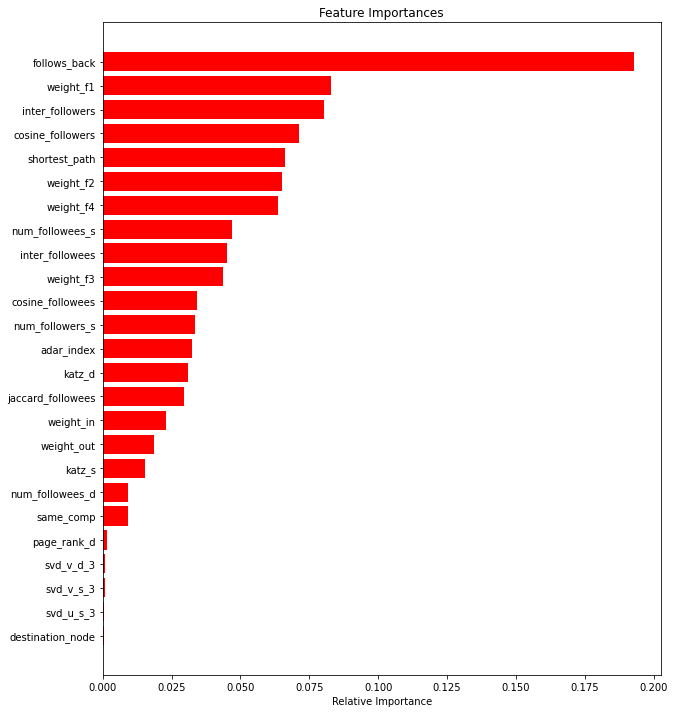

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [17]:
# Load data
if os.path.isfile('/content/drive/MyDrive/AAIC/Classroom/Assignment/15_Facebook/data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('/content/drive/MyDrive/AAIC/Classroom/Assignment/15_Facebook/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

DiGraph with 1780722 nodes and 7550015 edges


In [18]:
df_final_train.head(2)

,source_node,destination_node,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,0,0.000000,0.000000,0.000000,6,15,8,0,...,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,0,0.187135,0.028382,0.343828,94,61,142,11,...,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09


## 1 . Adding new features

### 1.1 Preferential Attachment
Preferential Attachment with followers and followees data of vertex.

There is an in buit function in Networkx but for undirected graph,

hence implementing the same formula with followers and followees data of vertex.
http://be.amazd.com/link-prediction/

$$Score(X,Y)={|N(X)|}{|N(Y)|}$$

In [19]:
# Preferential Attachment for followees.

def preferential_attachment_followees(a,b):
  try:
    if len(set(s for s in train_graph.successors(a))) == 0  | len(set(d for d in train_graph.successors(b))) == 0:
      return 0
    else:
      pa_followees = len(set(s for s in train_graph.successors(a))) * len(set(d for d in train_graph.successors(b)))
      return pa_followees
  except:
    return 0


In [20]:
# Preferential Attachment for followers.
def preferential_attachment_followers(a,b):
  try:
    if len(set(s for s in train_graph.predecessors(a))) == 0  | len(set(d for d in train_graph.predecessors(b))) == 0:
      return 0
    else:
      pa_followers = len(set(s for s in train_graph.predecessors(a))) * len(set(d for d in train_graph.predecessors(b)))
      return pa_followers
  except:
    return 0

In [21]:
# adding new column for followees
#train
df_final_train['pref_att_folowee'] = df_final_train.apply(lambda df: preferential_attachment_followees(df['source_node'],df['destination_node']),axis=1)

#test
df_final_test['pref_att_folowee'] = df_final_train.apply(lambda df: preferential_attachment_followees(df['source_node'],df['destination_node']),axis=1)


In [22]:
# adding new column for followers
#train
df_final_train['pref_att_folower'] = df_final_train.apply(lambda df: preferential_attachment_followers(df['source_node'],df['destination_node']),axis=1)

#test
df_final_test['pref_att_folower'] = df_final_train.apply(lambda df: preferential_attachment_followers(df['source_node'],df['destination_node']),axis=1)


### 1.2 svd_dot.
Dot product between sourse node svd and destination node svd features

https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf

In [23]:
# Dot product between source and destination of SVD decomposition U matrix

u_s = [i for i in df_final_train.columns if 'u_s' in i] # List of column names from source of U matrix 
u_d = [i for i in df_final_train.columns if 'u_d' in i] # List of column names from destination of U matrix

# Dot product operation between source and destination column names of U matrix

# u_svd_dot of train data
df_final_train['u_svd_sd_dot'] = (df_final_train[u_s].values * df_final_train[u_d].values).sum(axis=1) 

# u_svd_dot of test data
df_final_test['u_svd_sd_dot'] = (df_final_test[u_s].values * df_final_test[u_d].values).sum(axis=1) 
                                 

In [24]:
# Dot product between source and destination of SVD decomposition V matrix

v_s = [i for i in df_final_train.columns if 'v_s' in i] # List of column names from source of V matrix 
v_d = [i for i in df_final_train.columns if 'v_d' in i] # List of column names from destination of V matrix

# Dot product operation between source and destination column names of V matrix

# v_svd_dot of train data
df_final_train['v_svd_sd_dot'] = (df_final_train[v_s].values * df_final_train[v_d].values).sum(axis=1)

# v_svd_dot of test data
df_final_test['v_svd_sd_dot'] = (df_final_test[v_s].values * df_final_test[v_d].values).sum(axis=1)


In [25]:
# Removing source and destination
df_final_train.drop(['source_node','destination_node'],axis=1,inplace=True)
df_final_test.drop(['source_node','destination_node'],axis=1,inplace=True)

In [26]:
df_final_train.head(3)

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_att_folowee,pref_att_folower,u_svd_sd_dot,v_svd_sd_dot
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,120,66,1.114958e-11,2.238775e-12
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,8662,1598,3.192812e-03,9.068719e-04
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,902,980,1.787503e-35,2.467873e-36


In [27]:
df_final_test.head(3)

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_att_folowee,pref_att_folower,u_svd_sd_dot,v_svd_sd_dot
0,0,0.0,0.029161,0.0,14,6,9,1,0,0.0,...,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,120,66,8.425267e-20,2.074808e-17
1,0,0.0,0.000000,0.0,17,1,19,0,0,0.0,...,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,8662,1598,1.352160e-17,1.188376e-17
2,0,0.0,0.000000,0.0,10,16,9,0,0,0.0,...,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,902,980,3.671980e-13,3.904885e-12


In [28]:
# XGBoost with hyper parameter random search cv

Xclf = XGBClassifier()


param = {
    'learning_rate'   :[0.05,0.1,0.15],
    'n_estimators'    :[50,100,300],
    'max_depth'       :[1,3,5,7]
}

rs_cv = RandomizedSearchCV(Xclf,param_distributions=param,n_iter=5,n_jobs=-1,
                           return_train_score=True,cv=10,scoring='f1',
                           verbose=10,random_state=25)

rs_cv.fit(df_final_train,y_train)
print('mean test scores',rs_cv.cv_results_['mean_test_score'])
print('mean train scores',rs_cv.cv_results_['mean_train_score'])

Fitting 10 folds for each of 5 candidates, totalling 50 fits
mean test scores [0.97357092 0.97466742 0.96217083 0.97399742 0.97752865]
mean train scores [0.97436054 0.975304   0.96205953 0.97483794 0.97931947]


In [29]:
# Best parameters through random search CV
print (rs_cv.best_params_)

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}


In [30]:
# Fit the XGBoost CLF with best parameters and predict
XGBclf = XGBClassifier(n_estimators=300, max_depth= 3, learning_rate=0.1,
                        n_jobs=-1, random_state=25)

XGBclf.fit(df_final_train,y_train)
y_train_pred = XGBclf.predict(df_final_train)
y_test_pred = XGBclf.predict(df_final_test)

In [31]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9792902991401234
Test f1 score 0.9131351374607408


Train confusion_matrix


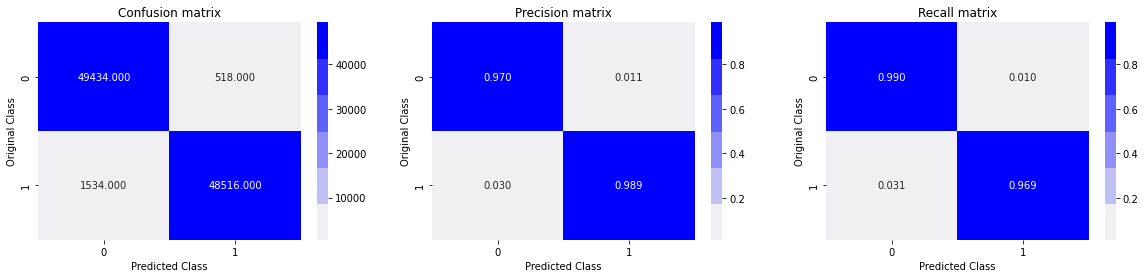

Test confusion_matrix


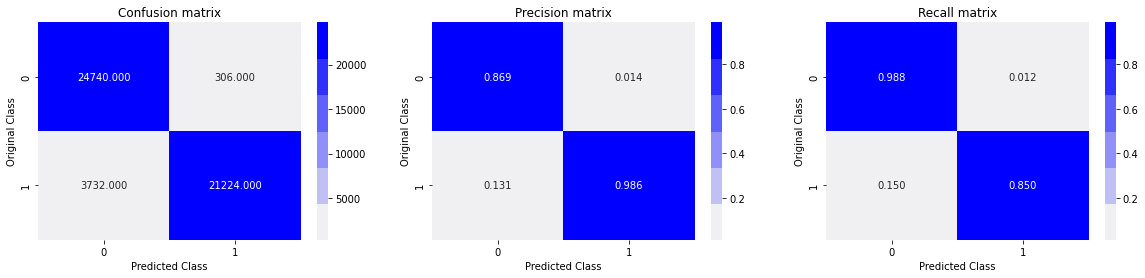

In [32]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

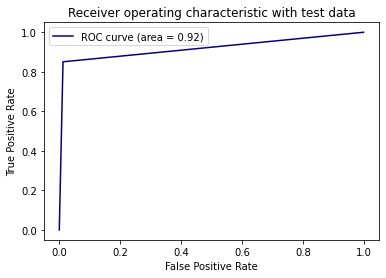

In [33]:
fpr,tpr,thres = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

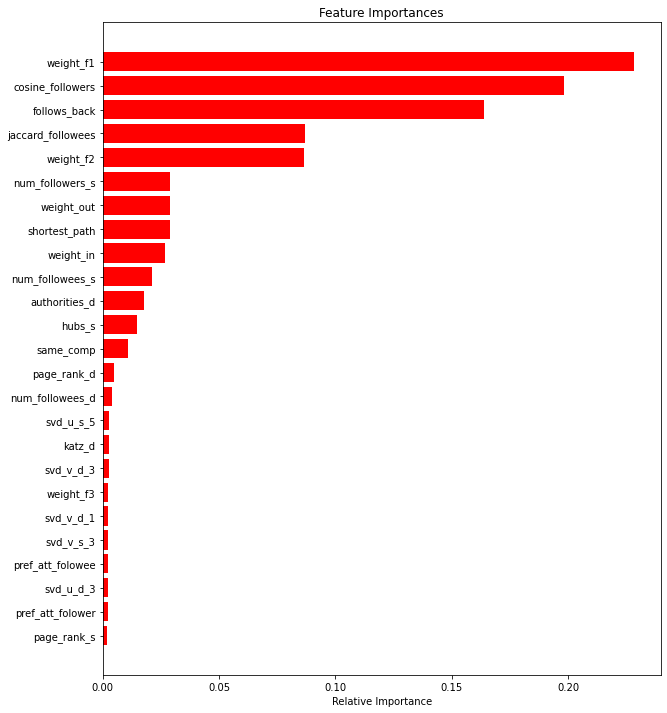

In [35]:
features = df_final_train.columns
importances = XGBclf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 2 . Summary 


In [12]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model and Feature Comparision "
ptable.field_names = ["Model",'Features','F1 score']
ptable.add_row(["Random Forest","Old","0.9257"])
ptable.add_row(["XG boost","New","0.9131"])
print(ptable)

+-------------------------------------+
|    Model and Feature Comparision    |
+---------------+----------+----------+
|     Model     | Features | F1 score |
+---------------+----------+----------+
| Random Forest |   Old    |  0.9257  |
|    XG boost   |   New    |  0.9131  |
+---------------+----------+----------+



* After applying features like Preferential Attachment and SVD DOT test F1 score = 0.9131.
* Before applying these features f1 score = 0.9257, which was better.
* The decrease could be because Preferential Attachment is for undirected graph and its feature importance in not great.
* We need to add more features related to directed graph to increase F1 score. 

# **Step by step procedure on Case study**

**1) Procedure before assignment.**

**1.1) Problem statement and Analyzing Data.**
  
* Given a directed social graph, have to predict missing links to recommend users (Link Prediction in graph).
* Data contains two columns source and destination edge.
* Analyzing Number of followeres, followees and followers+followees for each node. 

**1.2) Business objectives and constraints.**
* No low-latency requirement.
* Probability of prediction is useful to recommend ighest probability links.

**1.3) Mapping into supervised classification problem.**
* We have got data which has source and destination edge i.e for a pair of nodes in the data there is already a edge present, bur we do not have data where there is no edge.
* Hence we create BAD nodes i.e generating pair of source and destination node of same size for which there's no edge for supervised binary classification.
* Generated Bad links from graph which are not in graph and whose shortest path is greater than 2 because if 2 is included they might eventually be followed.
* Stratify train and cross validation split i.e have equal number of class in train and CV.
* For each pair of link got some features (from research papers on social media link prediction) like no of followers, is he followed back, page rank, katz score, adar index, some svd fetures of adj matrix, some weight features etc. and trained ml model based on these features to predict link.


**1.4) Model evaluation and Performance metric.** 
* Both precision and recall is important so F1 score is good choice.
* Confusion matrix to understand model's TP/FP/TN/FN.
* Classified using Random forest classifier with randim search CV hyper parameter tuining.
* ROC curve, binary classification visualization. 


**2) Assignment procedure to add new features and Tune hyperparameters for XG boost.**

**2.1) Add feature called Preferential Attachment.**
* Preferential Attachment with followers and followees data of vertex. There is an in buit function in Networkx but for undirected graph, hence implementing the same formula with followers and followees data of vertex.

**2.2) Add feature called svd_dot.**
* Dot product between sourse node svd and destination node svd features.

**2.3) XGBoost with hyper parameter random search cv.**
* Fit XGB classifier with best parameter post hyper parameter tuining.
* Confusion matrix to check TP/FP/TN/FN post adding new features.
* ROC curve, binary classification visualization.
